In [1]:
import pandas as pd

df = pd.read_csv("../SOCR_Data_Dinov_020108_HeightsWeights.csv")
df.sample(5)

,Height(Inches),Weight(Pounds)
9637,69.25580,138.4302
767,66.92866,120.1575
3381,69.25373,142.7731
19008,69.20931,138.4360
23163,68.81975,140.2789


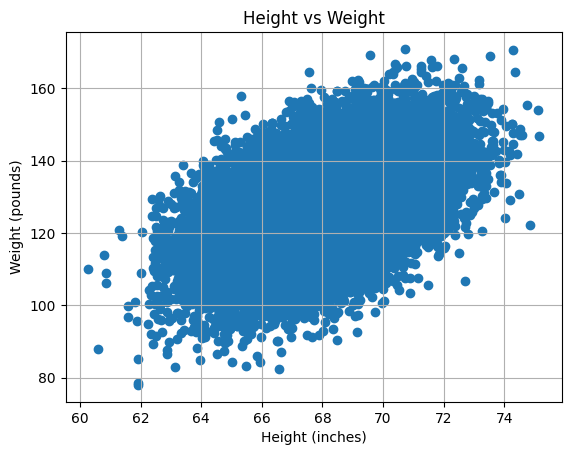

In [2]:
# Create a scatter plot of height vs weight
import matplotlib.pyplot as plt

plt.scatter(df["Height(Inches)"], df["Weight(Pounds)"])
plt.title("Height vs Weight")
plt.xlabel("Height (inches)")
plt.ylabel("Weight (pounds)")
plt.grid()
plt.show()

In [3]:
# Get 10% sample of the data
df_sample = df.sample(frac=0.01, random_state=1)
df_sample.reset_index(drop=True, inplace=True)

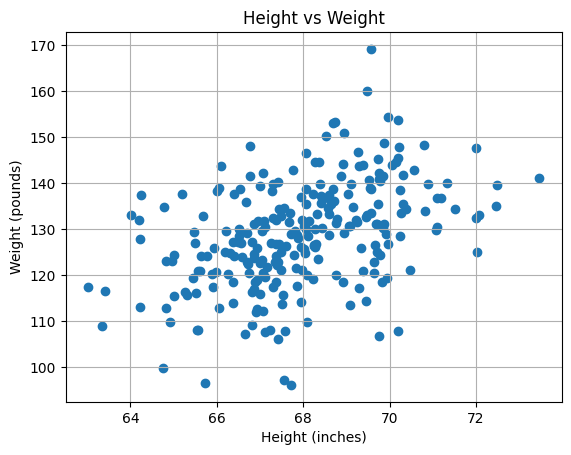

In [4]:
# Create a scatter plot of height vs weight
import matplotlib.pyplot as plt

plt.scatter(df_sample["Height(Inches)"], df_sample["Weight(Pounds)"])
plt.title("Height vs Weight")
plt.xlabel("Height (inches)")
plt.ylabel("Weight (pounds)")
plt.grid()
plt.show()

In [5]:
# Create a dataframe named as `df_sample_scaled` which applys the MinMaxScaler to the `df_sample` dataframe. The MinMaxScaler must use pure python and not any library.
class MinMaxScaler:
    def __init__(self, feature_range=(0, 1)):
        self.feature_range = feature_range
        self.min = None
        self.max = None

    def fit(self, X):
        self.min = X.min()
        self.max = X.max()

    def transform(self, X):
        return (X - self.min) / (self.max - self.min) * (
            self.feature_range[1] - self.feature_range[0]
        ) + self.feature_range[0]

    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)


scaler = MinMaxScaler()
df_sample_scaled = df_sample.copy()
df_sample_scaled["Height(Inches)"] = scaler.fit_transform(df_sample["Height(Inches)"])
df_sample_scaled["Weight(Pounds)"] = scaler.fit_transform(df_sample["Weight(Pounds)"])
df_sample_scaled.sample(5)

,Height(Inches),Weight(Pounds)
58,0.320694,0.425531
215,0.461161,0.347873
168,0.263075,0.384610
117,0.721969,0.639680
28,0.357712,0.623270


In [6]:
# Create a function named as min_max_scaler which applies the MinMaxScaler to the `df_sample` dataframe. The MinMaxScaler must use pure python and not any library or predefined class.
def min_max_scaler(df, feature_range=(0, 1)):
    min_val = df.min()
    max_val = df.max()
    scaled_df = (df - min_val) / (max_val - min_val) * (
        feature_range[1] - feature_range[0]
    ) + feature_range[0]
    return scaled_df


df_sample_scaled = df_sample.copy()
df_sample_scaled = min_max_scaler(df_sample, feature_range=(0, 1))
df_sample_scaled.sample(5)

,Height(Inches),Weight(Pounds)
185,0.686268,0.788238
145,0.164627,0.050071
191,0.664199,0.418583
54,0.538834,0.537253
228,0.437775,0.412283


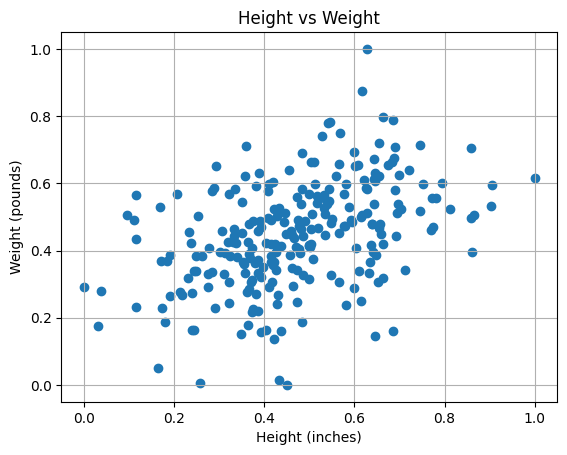

In [7]:
# Create a scatter plot of height vs weight
import matplotlib.pyplot as plt

plt.scatter(df_sample_scaled["Height(Inches)"], df_sample_scaled["Weight(Pounds)"])
plt.title("Height vs Weight")
plt.xlabel("Height (inches)")
plt.ylabel("Weight (pounds)")
plt.grid()
plt.show()

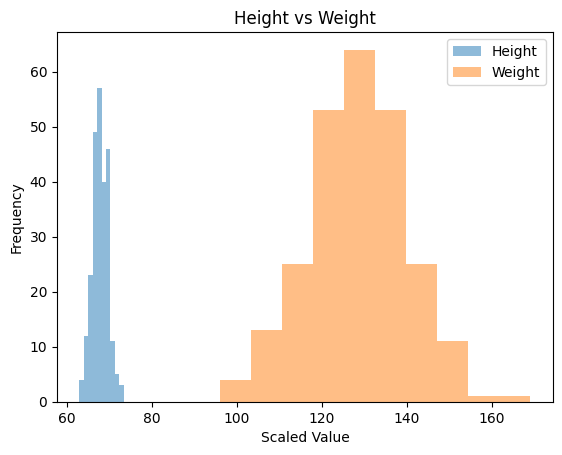

In [8]:
import matplotlib.pyplot as plt

plt.hist(df_sample["Height(Inches)"], bins=10, alpha=0.5, label="Height")
plt.hist(df_sample["Weight(Pounds)"], bins=10, alpha=0.5, label="Weight")
plt.title("Height vs Weight")
plt.xlabel("Scaled Value")
plt.ylabel("Frequency")
plt.legend()

In [9]:
# Get min and max value of the `Height(Inches)` and `Weight(Pounds)` columns from the `df_sample` dataframe
min_height = df_sample["Height(Inches)"].min()
max_height = df_sample["Height(Inches)"].max()
min_weight = df_sample["Weight(Pounds)"].min()
max_weight = df_sample["Weight(Pounds)"].max()
print(f"Min Height: {min_height}, Max Height: {max_height}")
print(f"Min Weight: {min_weight}, Max Weight: {max_weight}")

Min Height: 63.02668, Max Height: 73.46216
Min Weight: 96.06788, Max Weight: 169.1268


In [10]:
# Iterate over the `df_sample` dataframe on column `Height(Inches)`, create new column `Height(Inches)_scaled` and assign the scaled value of `Height(Inches)` to it.
df_sample["Height(Inches)_scaled"] = (df_sample["Height(Inches)"] - min_height) / (
    max_height - min_height
)
# Iterate over the `df_sample` dataframe on column `Weight(Pounds)`, create new column `Weight(Pounds)_scaled` and assign the scaled value of `Weight(Pounds)` to it.
df_sample["Weight(Pounds)_scaled"] = (df_sample["Weight(Pounds)"] - min_weight) / (
    max_weight - min_weight
)
df_sample.sample(5)

,Height(Inches),Weight(Pounds),Height(Inches)_scaled,Weight(Pounds)_scaled
186,67.68815,133.5415,0.446694,0.512923
203,68.08765,120.0428,0.484977,0.328159
7,69.51197,140.5772,0.621465,0.609225
22,66.72300,122.3498,0.354207,0.359736
229,67.97769,132.0200,0.474440,0.492098


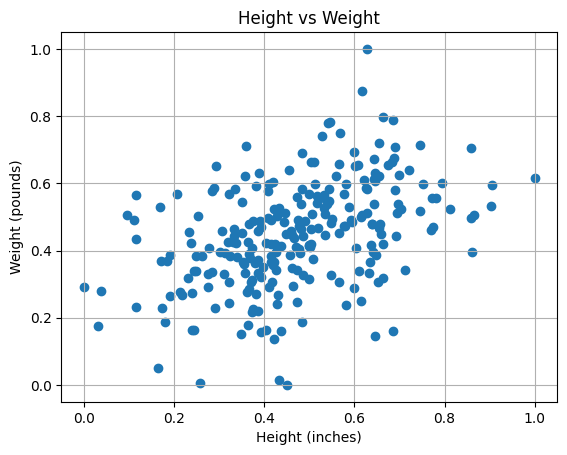

In [11]:
# Create a scatter plot of height vs weight
import matplotlib.pyplot as plt

plt.scatter(df_sample["Height(Inches)_scaled"], df_sample["Weight(Pounds)_scaled"])
plt.title("Height vs Weight")
plt.xlabel("Height (inches)")
plt.ylabel("Weight (pounds)")
plt.grid()
plt.show()

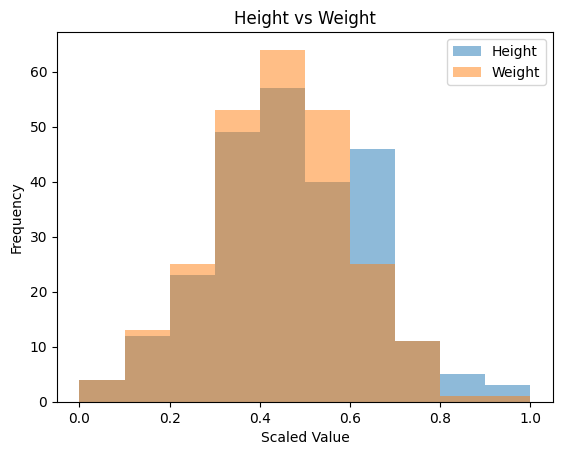

In [12]:
# Create histogram of `Height(Inches)_scaled` and `Weight(Pounds)_scaled` columns
import matplotlib.pyplot as plt

plt.hist(df_sample["Height(Inches)_scaled"], bins=10, alpha=0.5, label="Height")
plt.hist(df_sample["Weight(Pounds)_scaled"], bins=10, alpha=0.5, label="Weight")
plt.title("Height vs Weight")
plt.xlabel("Scaled Value")
plt.ylabel("Frequency")
plt.legend()